<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/3DFACEMODELING/3DMM_Fitting_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

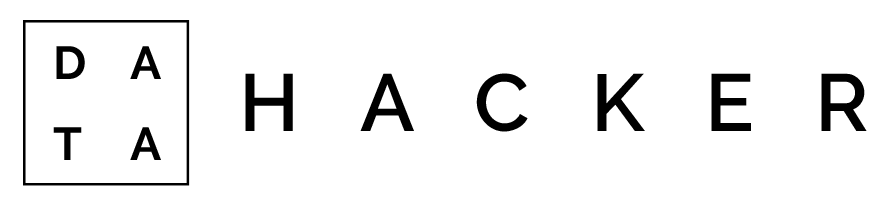
# 3DMM Model Fitting using PyTorch

First step for running the code is clonning the GitHub repository from Ascust, which has a very well explained instructions for running the code

In [ ]:
!git clone https://github.com/ascust/3DMM-Fitting-Pytorch

fatal: destination path '3DMM-Fitting-Pytorch' already exists and is not an empty directory.


## Downloading face model and expression basis file

Download the Basel Face Model and put "01_MorphableModel.mat" and put it into "BFM".
This file can be found at:
https://faces.dmi.unibas.ch/bfm/index.php?nav=1-2&id=downloads

Download the Expression Basis. Go to the repo, download the "CoarseData" and put "Exp_Pca.bin" into "BFM". You can download the file from:
https://github.com/Juyong/3DFace/blob/master/Exp_Pca.bin

Or alternatively, run the code blocks below and download them from our public google drive links.

We need to install `gdown` in order to download the files from google drive. We also need to install a pre-release version to be able to download big files. This can be achieved by adding the `--pre` after the package name, this can be seen in the command below.

In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1fHhT2WC9ld5tClHJUpK9RASzwRy974pd # Generic face model
!gdown --id 19WlNpIeJ9quXMDk0FdFTuPelsTwkIF5e # Emotion expression file

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fHhT2WC9ld5tClHJUpK9RASzwRy974pd
To: /content/BaselFaceModel.tgz
100% 240M/240M [00:02<00:00, 114MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19WlNpIeJ9quXMDk0FdFTuPelsTwkIF5e
To: /content/Exp_Pca.bin
100% 51.1M/51.1M [00:00<00:00, 163MB/s]


In [ ]:
# Unzip the file we just downloaded
!tar -xvf /content/BaselFaceModel.tgz

PublicMM1/01_MorphableModel.mat
PublicMM1/09_mask/
PublicMM1/09_mask/face05_4seg.mat
PublicMM1/09_mask/face05_4seg.txt
PublicMM1/04_attributes.mat
PublicMM1/11_feature_points/Farkas_face05.fp
PublicMM1/11_feature_points/fit_face05_9.fp
PublicMM1/11_feature_points/MPEG4_FDP_face05.fp
PublicMM1/13_symmetry_indices/
PublicMM1/13_symmetry_indices/face05_symlist.txt
PublicMM1/matlab/
PublicMM1/matlab/script_gen_random_head.m
PublicMM1/matlab/script_render_fittings.m
PublicMM1/matlab/script_load_scan.m
PublicMM1/matlab/object2coef.m
PublicMM1/matlab/idx2intl.m
PublicMM1/matlab/coef2object.m
PublicMM1/matlab/defrp.m
PublicMM1/matlab/load_model.m
PublicMM1/matlab/apply_attributes.m
PublicMM1/matlab/display_face.m
PublicMM1/matlab/plywrite.m


Now that we have the files downloaded we need to place them in the corresponding folders. Inside the repository folder that we downloaded from GitHub, "3DMM-Fitting-Pytorch", is a folder called "BFM" where we need to place two files we downloaded, '01_MorphableModel.mat' (can be found in the folder "PublicMM1") and 'Exp_Pca.bin'. 

We can achieve this by running the command below, which will copy the files into the folder.

In [ ]:
!cp /content/PublicMM1/01_MorphableModel.mat /content/3DMM-Fitting-Pytorch/BFM/01_MorphableModel.mat
!cp /content/Exp_Pca.bin /content/3DMM-Fitting-Pytorch/BFM/Exp_Pca.bin

We will move into the folder "3DMM-Fitting-Pytorch" and work inside of it.

In [ ]:
%cd 3DMM-Fitting-Pytorch

/content/3DMM-Fitting-Pytorch


We have downloaded a Generic face model that is called `Basel Face Model` and also some generic expression coefficients `Exp_Pca.bin`. The model that we downloaded contains 53490 vertexes and the expression basis contains 53215 vertexes, while the model we are trying to generate consists of 35709 vertices, so we need to select the corresponding vertex to get our face model. In order to select those that vertices on the 3D model that are corresponding between the `Basel Face Model` and our face model, we will just run the command below, if you want more detail about how this is done, you can open the script `convert_bfm09_data.py`.

In [ ]:
!python convert_bfm09_data.py

## Dependency installation

In order to work with meshes and vertices in Python we will install PyTorch3D, which is a Python library. The installation is not straightforward on Windows, but with collab/linux and CUDA this is pretty easy.

We need several dependencies to be able to install PyTorch3D and they are listed and installed in the block below.

In [ ]:
!pip install iopath # lightweight I/O abstraction library
!pip install fvcore # provides the most common and essential functionality

We will also need some dependencies for face and landmark detection. For the face detection we will go with MTCNN, so we need to install `facenet_pytorch`. For the landmark detection we will use Bulat Landmarks, which can be found inside the `face_alignment` library.

In [ ]:
!pip install facenet_pytorch
!pip install face_alignment

After installing these dependencies we move on. To install PyTorch3D we just run the code blocks below. Note: if you do no want to install PyTorch (you may have it already installed) depending on your torch and cuda versions you may need to modify the wheel information in the URL.

In [ ]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113

In [ ]:
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

## Creating a 3DMM model from an image

Now, let us import all the needed dependencies and modules. Here we will also import the PyTorch3D functions that we will be using.

In [ ]:
from facenet_pytorch import MTCNN
import cv2
import face_alignment
import numpy as np
from core import get_recon_model
import os
import torch
import core.utils as utils
from tqdm import tqdm
import core.losses as losses
from scipy.io import loadmat

import torch.nn as nn
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesVertex,
    blending
)

Brace yourselves, a code block with over 10 hyperparameters. But they are not that complex, mostly paths and parameters for the model training and fitting. 


We have also provided follow up comments if you are interested in exploring them.

In [ ]:
img_path = "/content/3DMM-Fitting-Pytorch/data/000033.jpg"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
recon_model = "bfm09"
tar_size = 256 # size for rendering window. We use a square window

rf_lr = 1e-2 # learning rate for rigid fitting
first_rf_iters = 1000 # iteration number of rigid fitting for the first frame in video fitting.
lm_loss_w = 100 # weight for landmark loss

nrf_lr = 1e-2 # learning rate for non-rigid fitting
first_nrf_iters = 500 # iteration number of non-rigid fitting for the first frame in video fitting
id_reg_w = 1e-3 # weight for id coefficient regularizer
exp_reg_w = 0.8e-3 # weight for expression coefficient regularizer
tex_reg_w = 1.7e-6 # weight for texture coefficient regularizer
tex_w = 1 # weight for texture reflectance loss.
rgb_loss_w = 1.6 # weight for rgb loss

res_folder = "/content/"

As we have our hyperparameters set up, we will load in the face and landmark detection algorithms. In order to detect faces in images, we will be using the MTCNN algorithm. For landmark detection, we will be using the Bulat landmark detection algorithm, that can be found inside the `face_alignment` module. Below you can see how we loaded them in and later how we will use them.

In [ ]:
# init face detection and lms detection models
print('loading models')
mtcnn = MTCNN(device=device, select_largest=False)
fa = face_alignment.FaceAlignment(
    face_alignment.LandmarksType._3D, flip_input=False)                              

loading models


Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


  0%|          | 0.00/85.7M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip


  0%|          | 0.00/91.9M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip


  0%|          | 0.00/224M [00:00<?, ?B/s]

Now comes the interesting part, the model. As every face model consists out of parameters, this one is not any different. This face model consists of 257 parameters, and we are placing them all in a single vector. Breaking this vector into parts:
 * 80 for identity
 * 64 for expression
 * 80 for albedo/texture
 * 27 for lighting
 * 3  for rotation 
 * 3  for translation

Inside the "3DMM-Fitting-Pytorch" there is a folder named "core" and inside of it we can find a `BaseModel.py` script inside of which is a `BaseReconModel` class. This class has some functionalities that we will need further into the code. So, we will create a new class `BFM09ReconModel` which will inherit all the functions inside the `BaseReconModel`. Some of the functions that we will be using is for example `get_packed_tensors()` which returns the 257 long vector of coefficients that our model has learned based on an image input.

In [ ]:
from core.BaseModel import BaseReconModel

In [ ]:
class BFM09ReconModel(BaseReconModel):
  def __init__(self, model_dict, **kargs):
      super(BFM09ReconModel, self).__init__(**kargs)

      self.skinmask = torch.tensor(model_dict['skinmask'], requires_grad=False, device=self.device)

      self.kp_inds = torch.tensor(model_dict['keypoints']-1).squeeze().long().to(self.device)

      self.meanshape = torch.tensor(model_dict['meanshape'],
                                    dtype=torch.float32, requires_grad=False,
                                    device=self.device)

      self.idBase = torch.tensor(model_dict['idBase'],
                                  dtype=torch.float32, requires_grad=False,
                                  device=self.device)

      self.expBase = torch.tensor(model_dict['exBase'],
                                  dtype=torch.float32, requires_grad=False,
                                  device=self.device)

      self.meantex = torch.tensor(model_dict['meantex'],
                                  dtype=torch.float32, requires_grad=False,
                                  device=self.device)

      self.texBase = torch.tensor(model_dict['texBase'],
                                  dtype=torch.float32, requires_grad=False,
                                  device=self.device)

      self.tri = torch.tensor(model_dict['tri']-1,
                              dtype=torch.int64, requires_grad=False,
                              device=self.device)

      self.point_buf = torch.tensor(model_dict['point_buf']-1,
                                    dtype=torch.int64, requires_grad=False,
                                    device=self.device)

  # Gets particular landmark point
  def get_lms(self, vs):
      lms = vs[:, self.kp_inds, :]
      return lms

  # Splits the 257 long vector into different coefficient classes
  # Identity, Expression, Texture, Rotation, Lighting, Translation
  def split_coeffs(self, coeffs):
      id_coeff = coeffs[:, :80]  # identity(shape) coeff of dim 80
      exp_coeff = coeffs[:, 80:144]  # expression coeff of dim 64
      tex_coeff = coeffs[:, 144:224]  # texture(albedo) coeff of dim 80
      # ruler angles(x,y,z) for rotation of dim 3
      angles = coeffs[:, 224:227]
      # lighting coeff for 3 channel SH function of dim 27
      gamma = coeffs[:, 227:254]
      translation = coeffs[:, 254:]  # translation coeff of dim 3

      return id_coeff, exp_coeff, tex_coeff, angles, gamma, translation

  # Combines all the coefficients into a 257 long vector
  def merge_coeffs(self, id_coeff, exp_coeff, tex_coeff, angles, gamma, translation):
      coeffs = torch.cat([id_coeff, exp_coeff, tex_coeff,
                          angles, gamma, translation], dim=1)
      return coeffs

  # Forward function, used for training
  # It is used for RIGID and NON RIGID fitting
  # and for obtaining the final coefficients and mesh
  def forward(self, coeffs, render=True):
      batch_num = coeffs.shape[0]

      id_coeff, exp_coeff, tex_coeff, angles, gamma, translation = self.split_coeffs(
          coeffs)

      vs = self.get_vs(id_coeff, exp_coeff)

      rotation = self.compute_rotation_matrix(angles)

      vs_t = self.rigid_transform(
          vs, rotation, translation)

      lms_t = self.get_lms(vs_t)
      lms_proj = self.project_vs(lms_t)
      lms_proj = torch.stack(
          [lms_proj[:, :, 0], self.img_size-lms_proj[:, :, 1]], dim=2)
      if render:
          face_texture = self.get_color(tex_coeff)
          face_norm = self.compute_norm(vs, self.tri, self.point_buf)
          face_norm_r = face_norm.bmm(rotation)
          face_color = self.add_illumination(
              face_texture, face_norm_r, gamma)
          face_color_tv = TexturesVertex(face_color)

          mesh = Meshes(vs_t, self.tri.repeat(
              batch_num, 1, 1), face_color_tv)
          rendered_img = self.renderer(mesh)
          rendered_img = torch.clamp(rendered_img, 0, 255)

          return {'rendered_img': rendered_img,
                  'lms_proj': lms_proj,
                  'face_texture': face_texture,
                  'vs': vs_t,
                  'tri': self.tri,
                  'color': face_color}
      else:
          return {'lms_proj': lms_proj}

  def get_vs(self, id_coeff, exp_coeff):
      n_b = id_coeff.size(0)

      face_shape = torch.einsum('ij,aj->ai', self.idBase, id_coeff) + \
          torch.einsum('ij,aj->ai', self.expBase, exp_coeff) + self.meanshape

      face_shape = face_shape.view(n_b, -1, 3)
      face_shape = face_shape - \
          self.meanshape.view(1, -1, 3).mean(dim=1, keepdim=True)

      return face_shape

  def get_color(self, tex_coeff):
      n_b = tex_coeff.size(0)
      face_texture = torch.einsum(
          'ij,aj->ai', self.texBase, tex_coeff) + self.meantex

      face_texture = face_texture.view(n_b, -1, 3)
      return face_texture

  def get_skinmask(self):
      return self.skinmask

  def init_coeff_dims(self):
      self.id_dims = 80
      self.tex_dims = 80
      self.exp_dims = 64


Now that we have defined our model, we can create an object. We will load the previously created generic face model, `BFM09_model_info.mat`, which is located inside the "3DMM-Fitting-Pytorch/BFM" folder. We will load it in using the function `loadmat` from `scipy` and create our `recon_model`.

In [ ]:
model_path = 'BFM/BFM09_model_info.mat'
model_dict = loadmat(model_path)
recon_model = BFM09ReconModel(model_dict, 
                              device=device,
                              batch_size=1,
                              img_size=tar_size)

We will load the image on which we want to detect our 3D face model. As we are loading our image using cv2,  it is loaded in a BGR format, and we need to convert it into RGB. 

In [ ]:
print('Loading image')
img_arr = cv2.imread(img_path)[:, :, ::-1] # Converting from BGR to RGB
orig_h, orig_w = img_arr.shape[:2]

print(f'Image is loaded, with the width of: {orig_w}, and height of: {orig_h}')

Loading image
Image is loaded, with the width of: 250, and height of: 262


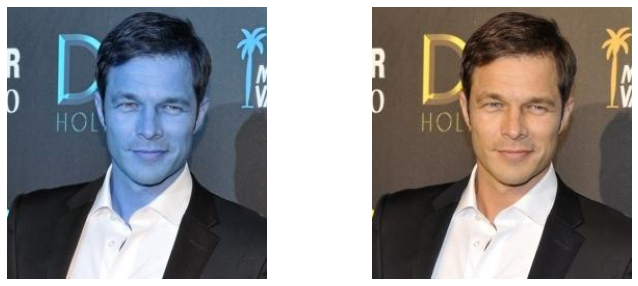

As the next step, we will detect the face, crop it and resize to a dimension of 256x256. On this cropped face we want to detect the face landmarks out of which we will obtain 3D coordinates. As we only care about the 2D coordinates we are dropping the third column, leaving us with the 2D coordinates.

In [ ]:
# Detect the face using MTCNN library
bboxes, probs = mtcnn.detect(img_arr)

if bboxes is None:
    print('no face detected')
else:
    bbox = utils.pad_bbox(bboxes[0], (orig_w, orig_h), 0.3)
    face_w = bbox[2] - bbox[0]
    face_h = bbox[3] - bbox[1]
    assert face_w == face_h
print('Face is detected. l: %d, t: %d, r: %d, b: %d'
      % (bbox[0], bbox[1], bbox[2], bbox[3]))

face_img = img_arr[bbox[1]:bbox[3], bbox[0]:bbox[2], :]
resized_face_img = cv2.resize(face_img, (tar_size, tar_size))

# lms stands short for landmarks
lms = fa.get_landmarks_from_image(resized_face_img)[0] # Detect landmarks
lms = lms[:, :2][None, ...] # Take only the X, Y and drop the third axis, Z (3D to 2D)
lms = torch.tensor(lms, dtype=torch.float32, device=device)
img_tensor = torch.tensor(
    resized_face_img[None, ...], dtype=torch.float32, device=device)

print('Landmarks detected.')

Face is detected. l: 58, t: 28, r: 214, b: 184
Landmarks detected.


We have drawn the landmarks on the face just for visualization purposes, the image can be seen below.

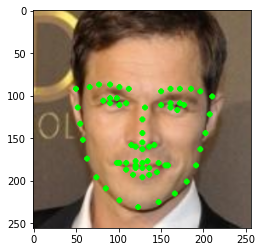

The next step is performing a rigid transformation. This transformation aims to calculate the rotation and translation coefficients. It will take the landmarks that we just detected and try and overlap them as best as it can over the generic face model that we loaded in. It will not deform the landmarks but just perform the basic translation and rotation. So, we expect in our coefficient vector to find 6 values modified as we have 3 values for rotation and 3 for rotation.

Our coefficients can be found inside the `recon_model.get_packed_tensors()` function, so we have a 257 long vector. In the beggining this vector consists of only zeros, and after the rigid we want to find some values modified.

In [ ]:
recon_model.get_packed_tensors()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
print('start rigid fitting')
rigid_optimizer = torch.optim.Adam([recon_model.get_rot_tensor(),
                                    recon_model.get_trans_tensor()],
                                    lr=rf_lr)
lm_weights = utils.get_lm_weights(device)
for i in tqdm(range(first_rf_iters)):
    rigid_optimizer.zero_grad()
    pred_dict = recon_model(recon_model.get_packed_tensors(), render=False)
    lm_loss_val = losses.lm_loss(
        pred_dict['lms_proj'], lms, lm_weights, img_size=tar_size)
    total_loss = lm_loss_w * lm_loss_val
    total_loss.backward()
    rigid_optimizer.step()
print('done rigid fitting. lm_loss: %f' %
      lm_loss_val.detach().cpu().numpy())

start rigid fitting


100%|██████████| 1000/1000 [00:04<00:00, 221.74it/s]

done rigid fitting. lm_loss: 0.000075


After the rigid transformation we can print out our coefficients and find that only 6 zeros were modified and now have some values. These are the rotation and translation coefficients and we printed them out below

In [ ]:
print(f"Rotation    {recon_model.get_packed_tensors()[0, 224:227].cpu().detach().numpy()}")
print(f"Translation {recon_model.get_packed_tensors()[0, 254:257].cpu().detach().numpy()}")

Rotation    [ 0.22985226 -0.0046919  -0.04185119]
Translation [ 0.01222747 -0.06925721  0.7250163 ]


After the rigid model fitting we can move on and do the non-rigid fitting. This is a slightly more complex process because we are trying to calculate a lot more coefficients. The non-rigid transformation morphs or deforms the mask so that the landmark points fit the face. In the end the result of this process is that we obtain the remaining coefficients that were not calculated in the rigid transformation.

In [ ]:
print('start non-rigid fitting')
nonrigid_optimizer = torch.optim.Adam(
    [recon_model.get_id_tensor(), recon_model.get_exp_tensor(),
      recon_model.get_gamma_tensor(), recon_model.get_tex_tensor(),
      recon_model.get_rot_tensor(), recon_model.get_trans_tensor()], lr=nrf_lr)
for i in tqdm(range(first_nrf_iters)):
    nonrigid_optimizer.zero_grad()

    pred_dict = recon_model(recon_model.get_packed_tensors(), render=True)
    rendered_img = pred_dict['rendered_img']
    lms_proj = pred_dict['lms_proj']
    face_texture = pred_dict['face_texture']

    mask = rendered_img[:, :, :, 3].detach()

    photo_loss_val = losses.photo_loss(
        rendered_img[:, :, :, :3], img_tensor, mask > 0)

    lm_loss_val = losses.lm_loss(lms_proj, lms, lm_weights,
                                  img_size=tar_size)
    id_reg_loss = losses.get_l2(recon_model.get_id_tensor())
    exp_reg_loss = losses.get_l2(recon_model.get_exp_tensor())
    tex_reg_loss = losses.get_l2(recon_model.get_tex_tensor())
    tex_loss_val = losses.reflectance_loss(
        face_texture, recon_model.get_skinmask())

    loss = lm_loss_val*lm_loss_w + \
        id_reg_loss*id_reg_w + \
        exp_reg_loss*exp_reg_w + \
        tex_reg_loss*tex_reg_w + \
        tex_loss_val*tex_w + \
        photo_loss_val*rgb_loss_w

    loss.backward()
    nonrigid_optimizer.step()

loss_str = ''
loss_str += 'lm_loss: %f\t' % lm_loss_val.detach().cpu().numpy()
loss_str += 'photo_loss: %f\t' % photo_loss_val.detach().cpu().numpy()
loss_str += 'tex_loss: %f\t' % tex_loss_val.detach().cpu().numpy()
loss_str += 'id_reg_loss: %f\t' % id_reg_loss.detach().cpu().numpy()
loss_str += 'exp_reg_loss: %f\t' % exp_reg_loss.detach().cpu().numpy()
loss_str += 'tex_reg_loss: %f\t' % tex_reg_loss.detach().cpu().numpy()
print('done non rigid fitting.', loss_str)

start non-rigid fitting


100%|██████████| 500/500 [00:33<00:00, 15.11it/s]

done non rigid fitting. lm_loss: 0.000055	photo_loss: 0.055718	tex_loss: 0.008171	id_reg_loss: 4.150595	exp_reg_loss: 1.915752	tex_reg_loss: 115.029221	


And finally, we will see the process of how to fit our mesh on the face. We will pass the coefficients that we have calculated. Also we set the flag `render=True` to create/render our image. We will blend the original image with the mask image and obtain our composed image, or final image.

We will also save the coefficients we just calculated, save our image and also the 3D mesh object. This file can also be opened with any 3D viewer and explored further from there as well. The final result will be saved in the directory that we defined in the beggining, `res_folder`. By default this will be the folder `/content/`.



In [ ]:
with torch.no_grad():
    coeffs = recon_model.get_packed_tensors()
    pred_dict = recon_model(coeffs, render=True)
    rendered_img = pred_dict['rendered_img']
    rendered_img = rendered_img.cpu().numpy().squeeze()
    out_img = rendered_img[:, :, :3].astype(np.uint8)
    out_mask = (rendered_img[:, :, 3] > 0).astype(np.uint8)
    resized_out_img = cv2.resize(out_img, (face_w, face_h))
    resized_mask = cv2.resize(
        out_mask, (face_w, face_h), cv2.INTER_NEAREST)[..., None]

    composed_img = img_arr.copy()
    composed_face = composed_img[bbox[1]:bbox[3], bbox[0]:bbox[2], :] * \
        (1 - resized_mask) + resized_out_img * resized_mask
    composed_img[bbox[1]:bbox[3], bbox[0]:bbox[2], :] = composed_face

    utils.mymkdirs(res_folder)
    basename = os.path.basename(img_path)[:-4]
    # save the composed image
    out_composed_img_path = os.path.join(
        res_folder, basename + '_composed_img.jpg')
    cv2.imwrite(out_composed_img_path, composed_img[:, :, ::-1])
    # save the coefficients
    out_coeff_path = os.path.join(
        res_folder, basename + '_coeffs.npy')
    np.save(out_coeff_path,
            coeffs.detach().cpu().numpy().squeeze())

    # save the mesh into obj format
    out_obj_path = os.path.join(
        res_folder, basename+'_mesh.obj')
    vs = pred_dict['vs'].cpu().numpy().squeeze()
    tri = pred_dict['tri'].cpu().numpy().squeeze()
    color = pred_dict['color'].cpu().numpy().squeeze()
    utils.save_obj(out_obj_path, vs, tri+1, color)

    print('composed image is saved at %s' % res_folder)

composed image is saved at /content/
